# Readout Mitigation



In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_experiments.library import MeasurementMitigation
# For simulation
from qiskit.providers.aer import AerSimulator
from qiskit.test.mock import FakeParis

backend = AerSimulator.from_backend(FakeParis())

In [2]:
SHOTS = 1024
qubits = [0,1,2,3]
num_qubits = len(qubits)

In [3]:
exp = MeasurementMitigation(qubits)
result = exp.run(backend)
mitigator = result.analysis_results(0).value

In [4]:
qc = QuantumCircuit(num_qubits, name="ghz_5_qubits")
qc.h(0)
for i in range(1, num_qubits):
    qc.cx(i - 1, i)
qc.measure_all()

In [5]:
counts = backend.run(qc, shots=SHOTS, seed_simulator=42, method="density_matrix").result().get_counts()
unmitigated_probs = {label: count / SHOTS for label, count in counts.items()}

In [6]:
mitigated_quasi_probs = mitigator.quasi_probabilities(counts)
mitigated_probs = (mitigated_quasi_probs.nearest_probability_distribution().binary_probabilities())

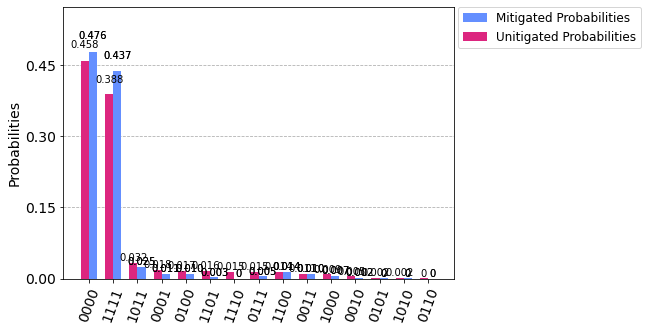

In [7]:
legend = ['Mitigated Probabilities', 'Unitigated Probabilities']
plot_histogram([mitigated_probs, unmitigated_probs], legend=legend, sort="value_desc")

In [8]:
import qiskit.tools.jupyter
%qiskit_copyright